### Suppressing Warnings
In this cell, we use `warnings.filterwarnings("ignore")` to suppress warnings. This can be useful to improve the readability of results in our notebook by removing warnings that might be generated by certain operations or libraries. However, it's important to note that suppressing warnings can sometimes hide potential issues. Therefore, it's recommended to use this feature with caution and ensure understanding of the reasons for the warnings before ignoring them.


In [39]:
import warnings
warnings.filterwarnings("ignore")

### Library Imports

We import necessary libraries including scikit-learn, NumPy, Pandas, LightGBM, Matplotlib, and relevant modules for data preprocessing, model evaluation, and regression algorithms.


In [40]:
import sklearn #type:ignore
import numpy as np  #type:ignore
import pandas as pd  #type:ignore
import seaborn as sns#type:ignore
import lightgbm as lgbm  #type:ignore
import matplotlib.pyplot as plt  #type:ignore
from sklearn.model_selection import train_test_split, GridSearchCV  #type:ignore
from sklearn.metrics import r2_score  #type:ignore
from sklearn.linear_model import Lasso  #type:ignore
from sklearn.preprocessing import StandardScaler  #type:ignore
from lightgbm import LGBMRegressor  #type:ignore
from sklearn.model_selection import cross_validate  #type:ignore
from sklearn.metrics import mean_squared_error #type:ignore
from sklearn.metrics import mean_absolute_error#type:ignore

### Reading Data

We use Pandas' `read_csv` function to load the data from a CSV file named "train.csv" into a DataFrame named `data`. The file path is specified using the raw string notation (`train.csv"`), which allows us to include backslashes without escaping them. This line assumes that the CSV file is located at the specified path.


In [41]:
data=pd.read_csv("train.csv")

### Checking for Missing Values

We use the `isnull()` method to create a DataFrame of boolean values indicating whether each element in `data` is null (`True`) or not (`False`). Then, we apply the `sum()` method to this DataFrame to count the number of null values in each column. This line helps us to identify columns with missing data.


In [42]:
data.isnull().sum()


stock_id                         0
date_id                          0
seconds_in_bucket                0
imbalance_size                 220
imbalance_buy_sell_flag          0
reference_price                220
matched_size                   220
far_price                  2894342
near_price                 2857180
bid_price                      220
bid_size                         0
ask_price                      220
ask_size                         0
wap                            220
target                          88
time_id                          0
row_id                           0
dtype: int64

### Visualizing Data Distribution

We use the `hist()` function on the DataFrame `data` to create histograms for each numerical column. The parameter `bins=50` specifies the number of bins for the histograms, and `figsize=(20,15)` sets the size of the figure. Finally, `plt.show()` displays the histograms using Matplotlib.


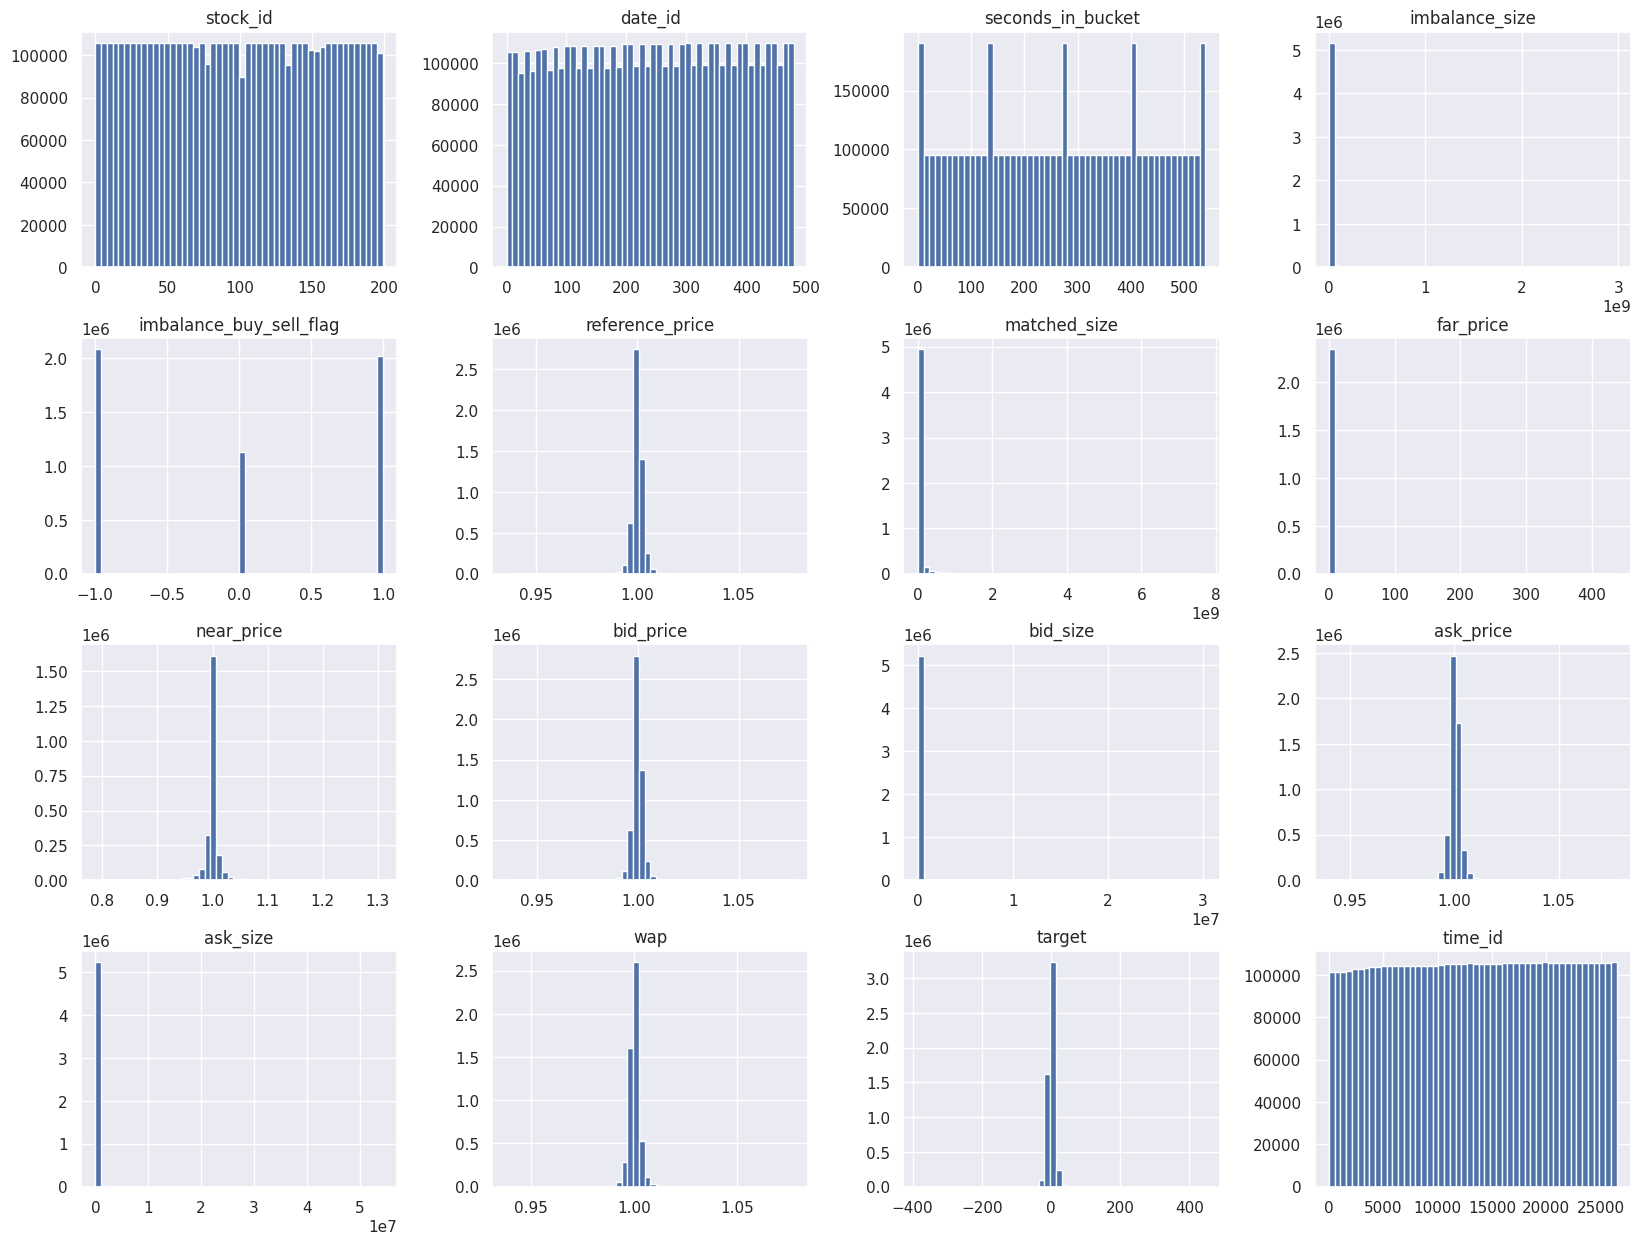

In [43]:
data.hist(bins=50, figsize=(20,15))
plt.show()


### Summary Statistics

We use the `describe()` method on the DataFrame `data` to generate summary statistics for each numerical column, including count, mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. The `.T` transposes the resulting DataFrame, flipping rows and columns for better readability.

In [44]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
stock_id,5237980.0,9.928856e+01,5.787176e+01,0.000000,4.900000e+01,9.900000e+01,1.490000e+02,1.990000e+02
date_id,5237980.0,2.415100e+02,1.385319e+02,0.000000,1.220000e+02,2.420000e+02,3.610000e+02,4.800000e+02
seconds_in_bucket,5237980.0,2.700000e+02,1.587451e+02,0.000000,1.300000e+02,2.700000e+02,4.100000e+02,5.400000e+02
imbalance_size,5237760.0,5.715293e+06,2.051591e+07,0.000000,8.453415e+04,1.113604e+06,4.190951e+06,2.982028e+09
imbalance_buy_sell_flag,5237980.0,-1.189619e-02,8.853374e-01,-1.000000,-1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
reference_price,5237760.0,9.999955e-01,2.532497e-03,0.935285,9.987630e-01,9.999670e-01,1.001174e+00,1.077488e+00
matched_size,5237760.0,4.510025e+07,1.398413e+08,4316.610000,5.279575e+06,1.288264e+07,3.270013e+07,7.713682e+09
far_price,2343638.0,1.001713e+00,7.214705e-01,0.000077,9.963320e-01,9.998830e-01,1.003318e+00,4.379531e+02
near_price,2380800.0,9.996601e-01,1.216920e-02,0.786988,9.971000e-01,9.998890e-01,1.002590e+00,1.309732e+00
bid_price,5237760.0,9.997263e-01,2.499345e-03,0.934915,9.985290e-01,9.997280e-01,1.000905e+00,1.077488e+00


### Data Manipulation Steps

1. **Copy DataFrame**: Creates a copy of the original DataFrame `data` and assigns it to a new variable `df`.

2. **Drop Rows with Missing Values**: Drops rows where the column "ask_price" has missing values (`NaN`) using the `dropna()` method with the subset parameter.

3. **Assigning Values based on Condition**: For rows where the "seconds_in_bucket" column is less than or equal to 300, sets the "near_price" and "far_price" columns to 0.

4. **Interpolation**: Interpolates missing values in the "far_price" and "near_price" columns using the `interpolate()` method. This method fills in missing values by computing a linear interpolation.

5. **Check for Missing Values**: Prints the total number of missing values in each column of the DataFrame `df` using the `isnull().sum()` method.

In [45]:
df=data.copy()
df = df.dropna(subset=["ask_price"], axis=0)
df.loc[df['seconds_in_bucket'] <= 300, "near_price"] = 0
df.loc[df['seconds_in_bucket'] <= 300, "far_price"] = 0
df['far_price'] = df['far_price'].interpolate()
df['near_price'] = df['near_price'].interpolate()
df.isnull().sum()

### Visualizing Data Distribution

We use the `hist()` function on the DataFrame `df` to create histograms for each numerical column. The parameter `bins=50` specifies the number of bins for the histograms, and `figsize=(20,15)` sets the size of the figure. Finally, `plt.show()` displays the histograms using Matplotlib.

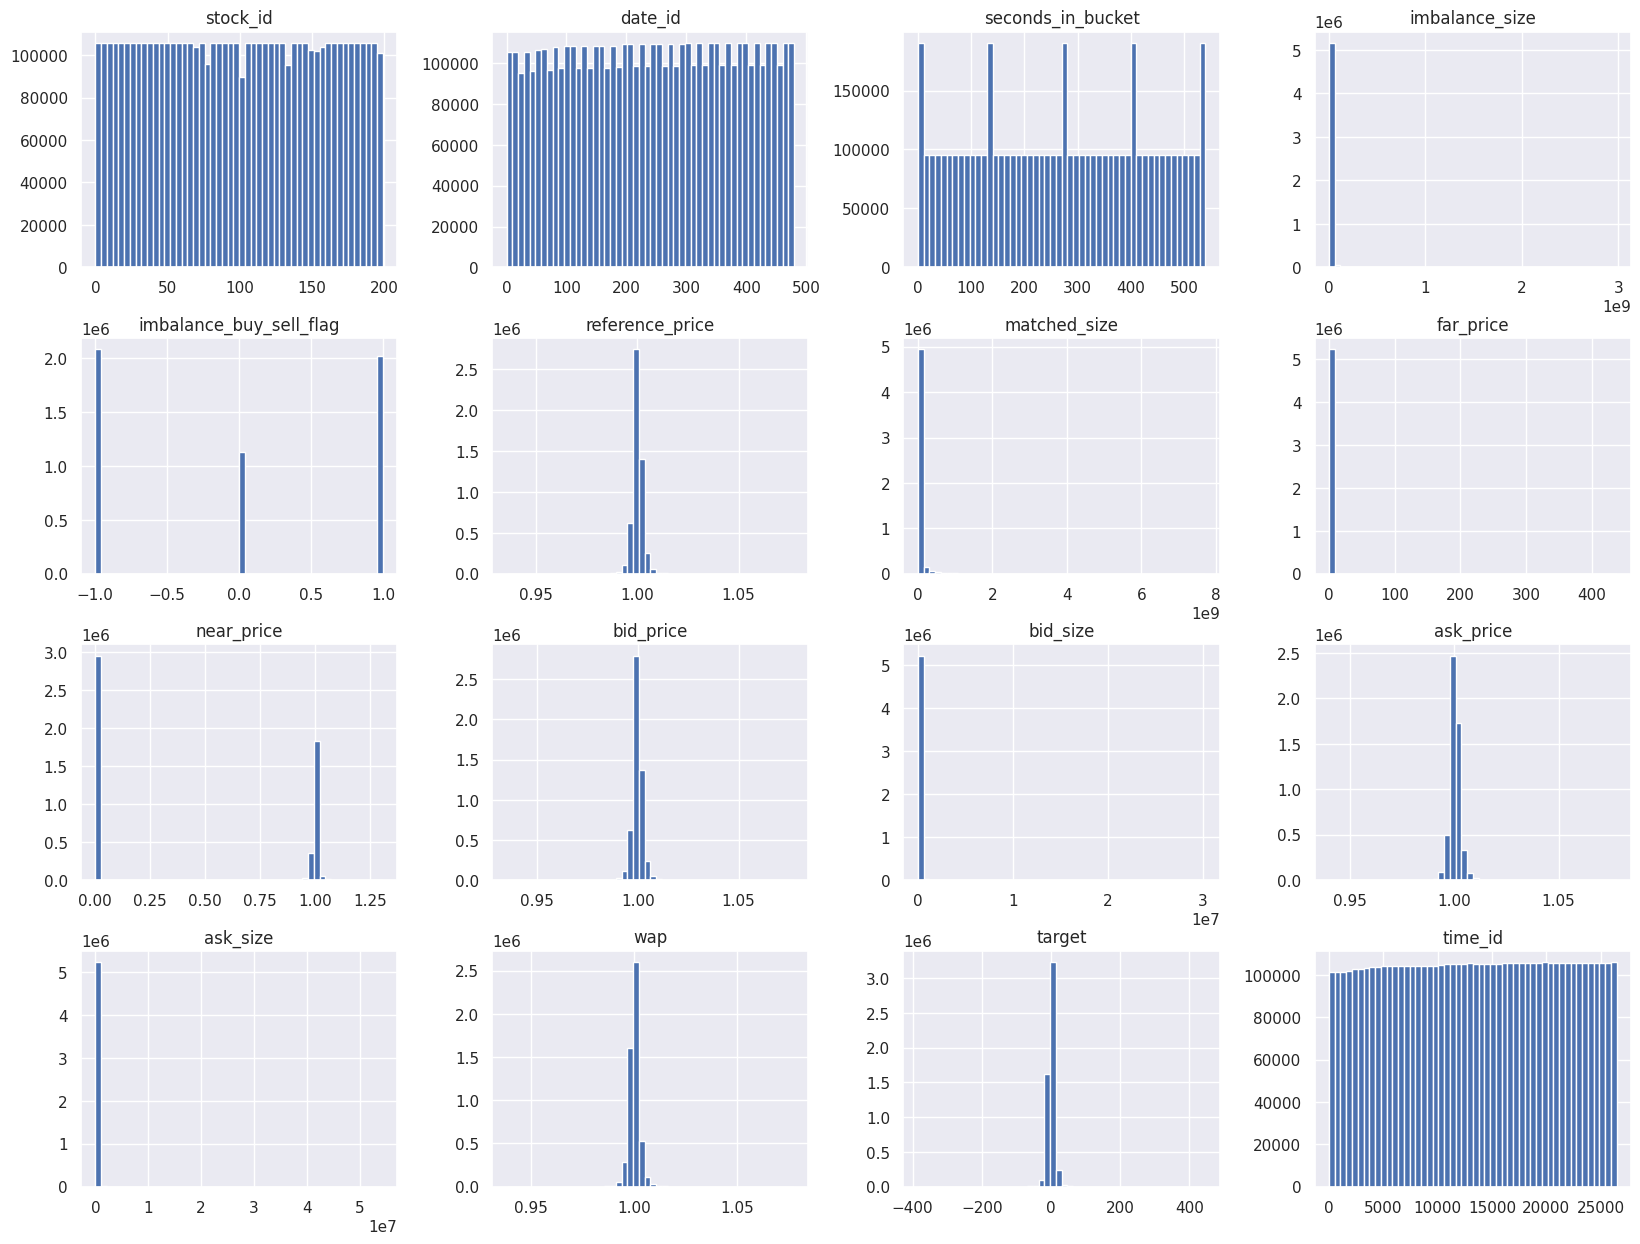

In [48]:
df.hist(bins=50, figsize=(20,15))
plt.show()


### Creating Boxplot for Selected Columns

1. **Select Columns**: Specifies a list of column names (`colonnes_a_tracer`) that you want to include in the boxplot. These columns include 'reference_price', 'matched_size', 'ask_price', 'bid_price', and 'wap'.

2. **Subset DataFrame**: Creates a new DataFrame `df_selected` containing only the columns specified in `colonnes_a_tracer`.

3. **Create Boxplot**: Uses Seaborn's `boxplot()` function to create a horizontal boxplot for the selected columns (`df_selected`). The `orient="h"` parameter specifies a horizontal orientation for the boxplot.

4. **Set Figure Size and Title**: Sets the figure size to (12, 6) using Matplotlib's `plt.figure()` function. Sets the title of the plot to 'Boxplot des colonnes sélectionnées' (Boxplot of selected columns) using `plt.title()`.

5. **Display Plot**: Displays the boxplot using Matplotlib's `plt.show()` function.

This visualization allows you to compare the distribution of values across different columns and identify any potential outliers or variations in the data.

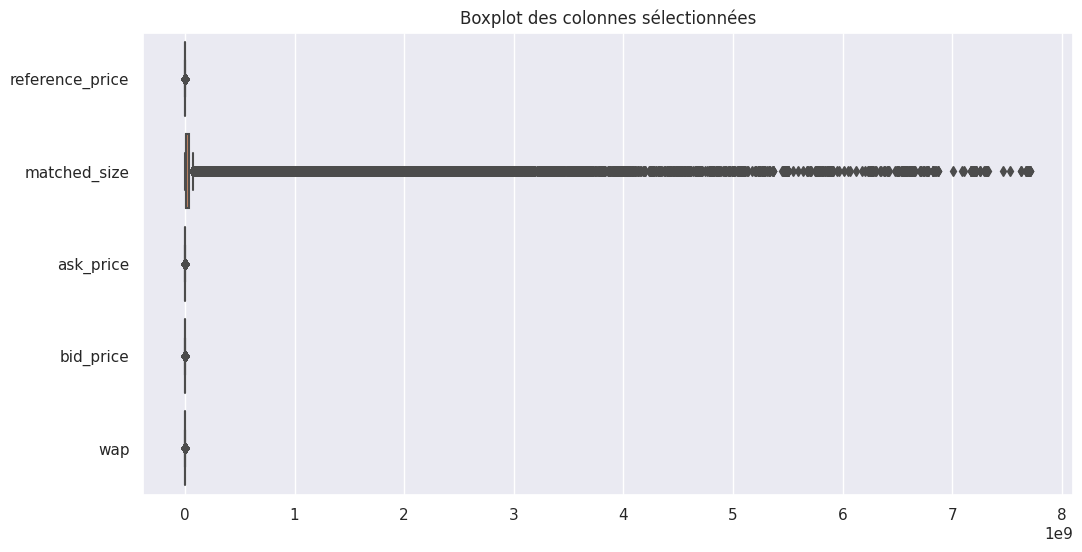

In [50]:

colonnes_a_tracer = ['reference_price', 'matched_size','ask_price','bid_price','wap']  

df_selected = df[colonnes_a_tracer]
plt.figure(figsize=(12, 6)) 

sns.boxplot(data=df_selected, orient="h")  

plt.title('Boxplot des colonnes sélectionnées')

plt.show()



### Outlier Handling Functions

These functions aim to identify and replace outliers in a given variable within a DataFrame.

1. **outlier_threshold(dataframe, variable)**:
   - Calculates lower and upper bounds for outliers based on the variable's interquartile range (IQR).
   - Returns the lower and upper limits.

2. **replace_with_threshold(dataframe, variable)**:
   - Utilizes outlier_threshold() to obtain lower and upper limits for the specified variable.
   - Replaces values below the lower limit with the lower limit and values above the upper limit with the upper limit in the DataFrame.
   - Returns the modified DataFrame.
```

This markdown summary provides a concise overview of the purpose and functionality of each function. Let me know if you need further assistance!

In [51]:
def outlier_threshold(dataframe, variable):
    Q1 = dataframe[variable].quantile(0.01)
    Q3 = dataframe[variable].quantile(0.99)
    IQR = Q3 - Q1
    up_limit = Q3 + 1.5 * IQR
    low_limit = Q1 - 1.5 * IQR
    return low_limit, up_limit

def replace_with_threshold(dataframe, variable):
    low_limit, up_limit = outlier_threshold(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit
    return dataframe  # Retourne le dataframe modifié même si aucune modification n'est nécessaire



### Iterating Through Variables and Replacing Outliers

1. **Variable Iteration**:
   - Loops through each variable in the list `variables`, which includes 'reference_price', 'matched_size', 'ask_price', 'bid_price', and 'wap'.

2. **Replace Outliers**:
   - For each variable, the `replace_with_threshold()` function is called to replace outliers with predefined threshold values.
   - The modified DataFrame is then reassigned to the variable `df` in each iteration.

By iterating through each variable and replacing outliers, this loop helps preprocess the data by handling outliers in multiple variables.


In [52]:
variables=['reference_price', 'matched_size','ask_price','bid_price','wap']
for variable in variables :
    df=replace_with_threshold(df,variable)

### Visualizing Correlation Matrix

1. **Calculate Correlation Matrix**:
   - Computes the correlation coefficients between all pairs of numerical columns in the DataFrame `df` using the `corr()` method.

2. **Create Heatmap**:
   - Uses Seaborn's `heatmap()` function to create a heatmap of the correlation matrix.
   - The `annot=True` parameter displays the correlation values on the heatmap.
   - The `cmap='coolwarm'` parameter sets the color map for the heatmap to a diverging color scheme from cool to warm.

3. **Set Figure Size**:
   - Sets the size of the figure to (16, 12) using Matplotlib's `plt.figure()` function.

4. **Display Heatmap**:
   - Displays the heatmap using Matplotlib's `plt.show()` function.

This visualization allows us to visually inspect the correlations between different variables in the dataset. Positive correlations are indicated by warmer colors, while negative correlations are indicated by cooler colors.

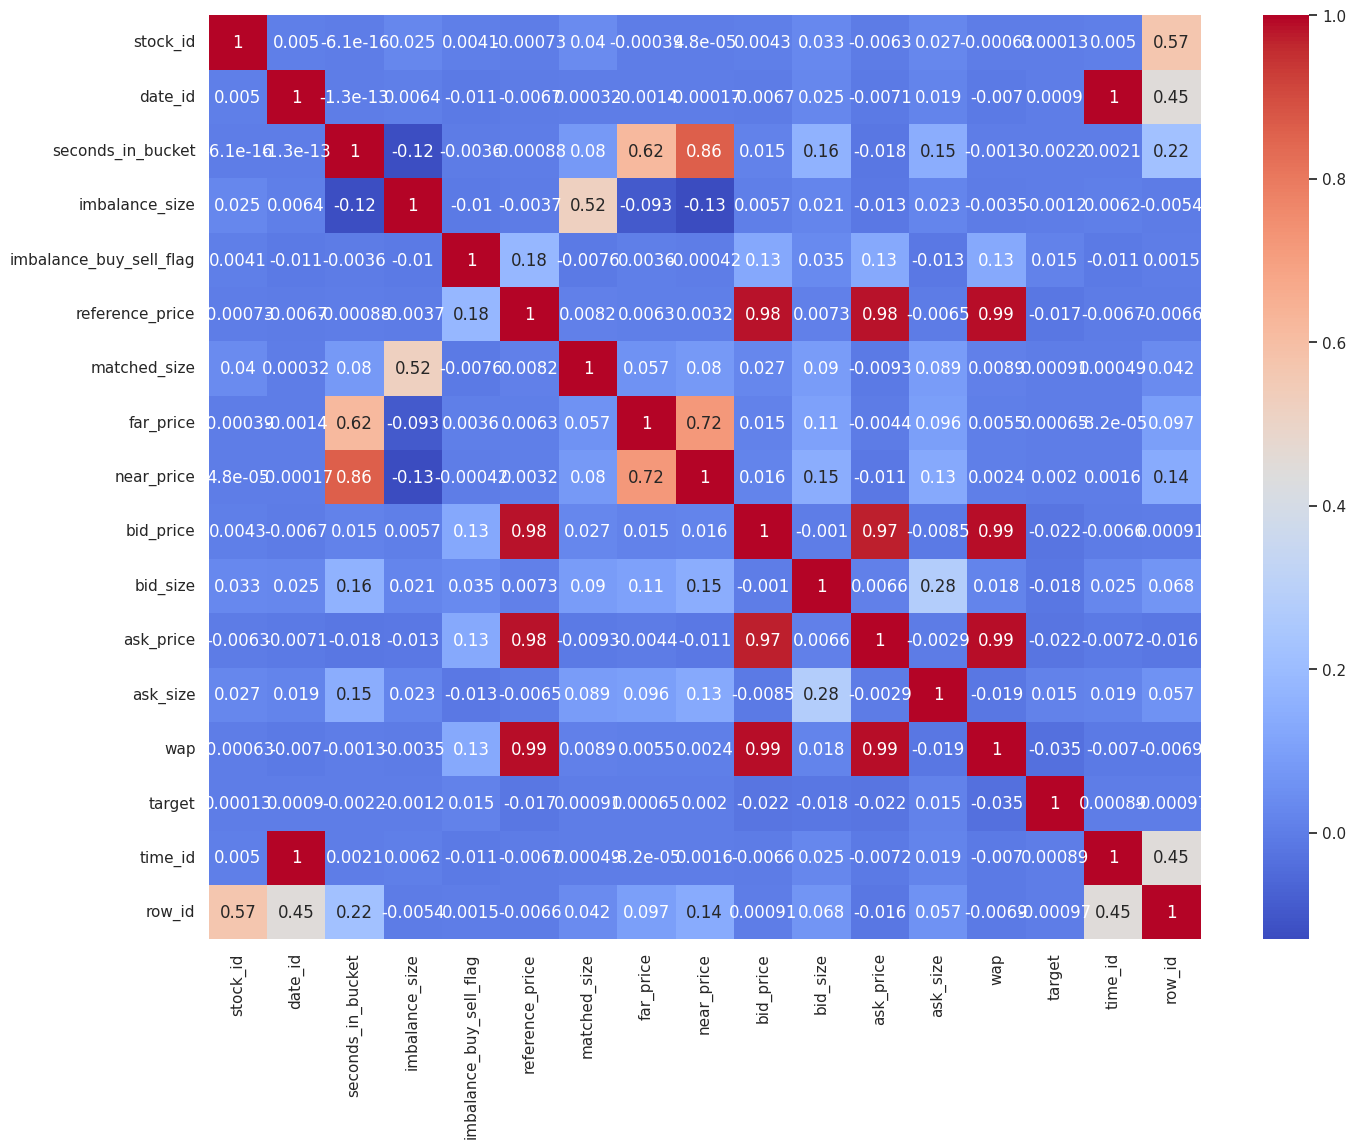

In [54]:
corr_matrix = df.corr()
plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Adding New Columns to DataFrame

1. **Spread**:
   - Computes the spread between the ask price and the bid price.

2. **Mid Price**:
   - Computes the mid price as the average of the ask price and the bid price.

3. **Price Impact**:
   - Computes the price impact as the difference between the reference price and the weighted average price (WAP).

4. **Total Volume**:
   - Computes the total volume as the sum of the bid size and the ask size.

5. **Volume Imbalance**:
   - Computes the volume imbalance as the difference between the bid size and the ask size.

6. **Price Volatility**:
   - Computes the price volatility as the rolling standard deviation of the mid price over a 10-period window.

7. **Momentum**:
   - Computes the momentum as the difference in mid price between the current and the fifth previous period.

8. **Log Return**:
   - Computes the logarithmic return of the mid price.

9. **Volume-Weighted Average Price (VWAP)**:
   - Computes the volume-weighted average price (VWAP) based on the matched size and the reference price.

These new columns provide additional insights and features derived from the existing data, which can be useful for analysis and modeling purposes.

In [55]:
df['spread'] = df['ask_price'] - df['bid_price']
df['mid_price'] = (df['ask_price'] + df['bid_price']) / 2
df['price_impact'] = df['reference_price'] - df['wap']
df['total_volume'] = df['bid_size'] + df['ask_size']
df['volume_imbalance'] = df['bid_size'] - df['ask_size']
df['price_volatility'] = df['mid_price'].rolling(window=10).std()
df['momentum'] = df['mid_price'].diff(periods=5)
df['log_return'] = np.log(df['mid_price'] / df['mid_price'].shift(1))
df['vwap'] = (df['matched_size'] * df['reference_price']).cumsum() / df['matched_size'].cumsum()

### Computing Relative Strength Index (RSI)

1. **Compute Price Changes**:
   - Calculates the difference between consecutive values in the series using the `diff()` method, representing the price changes.

2. **Separate Gains and Losses**:
   - Defines the gain as the positive differences (delta > 0) and the loss as the negative differences (delta < 0) using conditional masking.

3. **Calculate Average Gain and Loss**:
   - Computes the average gain and average loss over a specified period (default is 14) using the rolling mean over the gain and loss series.

4. **Compute Relative Strength (RS)**:
   - Calculates the relative strength (RS) as the ratio of average gain to average loss.

5. **Compute RSI**:
   - Computes the Relative Strength Index (RSI) using the formula: RSI = 100 - (100 / (1 + RS)).

6. **Return RSI**:
   - Returns the computed RSI series.

This function allows for the calculation of the RSI, which is a momentum oscillator that measures the speed and change of price movements, and it's often used in technical analysis to identify overbought or oversold conditions in a security or asset.


In [56]:
def compute_rsi(series, period=14):
    delta = series.diff()
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

In [57]:
df['rsi'] = compute_rsi(df['mid_price'])
df['sma_10'] = df['mid_price'].rolling(window=10).mean()
df['ema_10'] = df['mid_price'].ewm(span=10, adjust=False).mean()
df['imbalance_buy_sell_ratio'] = df['imbalance_size'] / df['matched_size']
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.reset_index(drop=True)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,...,total_volume,volume_imbalance,price_volatility,momentum,log_return,vwap,rsi,sma_10,ema_10,imbalance_buy_sell_ratio
0,13,0,0,5749286.01,1,0.998995,7039173.61,0.000000,0.000000,0.999074,...,13599.93,11055.53,0.000315,0.000054,-0.000460,1.000028,46.515752,0.999960,0.999960,0.816756
1,14,0,0,8899495.49,1,1.000495,39020484.94,0.000000,0.000000,0.999976,...,189709.24,-181066.76,0.000342,0.000494,0.000909,1.000131,55.046032,1.000039,1.000058,0.228072
2,15,0,0,4469771.00,1,0.999403,1765835.46,0.000000,0.000000,0.999334,...,230891.12,215788.24,0.000354,-0.000924,-0.000816,1.000124,45.133534,0.999986,0.999989,2.531250
3,16,0,0,472499.39,-1,0.999258,3438806.60,0.000000,0.000000,0.998948,...,10428.57,9329.67,0.000386,-0.000593,-0.000176,1.000107,47.058824,0.999947,0.999900,0.137402
4,17,0,0,12411362.37,-1,1.000966,27288881.25,0.000000,0.000000,0.999028,...,20743.44,4132.56,0.000387,-0.000207,0.000335,1.000219,47.757454,0.999937,0.999889,0.454814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237742,195,480,540,2440722.89,-1,1.000317,28280361.74,0.999734,0.999734,1.000317,...,352119.44,-287605.36,0.001607,0.001003,-0.001334,1.000050,48.116383,0.999972,1.000009,0.086305
5237743,196,480,540,349510.47,-1,1.000643,9187699.11,1.000129,1.000386,1.000643,...,298501.47,111715.33,0.001626,0.004823,0.000396,1.000050,53.377030,1.000064,1.000148,0.038041
5237744,197,480,540,0.00,0,0.995789,12725436.10,0.995789,0.995789,0.995789,...,196828.98,-163247.66,0.002109,-0.004817,-0.004944,1.000050,47.974664,0.999687,0.999364,0.000000
5237745,198,480,540,1000898.84,1,0.999210,94773271.05,0.999210,0.999210,0.998970,...,795524.72,-544261.28,0.002113,-0.002436,0.003262,1.000050,54.958347,0.999594,0.999314,0.010561


### Visualizing Correlation Matrix and Histograms

1. **Correlation Matrix**:
   - Calculates the correlation coefficients between all pairs of numerical columns in the DataFrame `df` using the `corr()` method.
   - Creates a heatmap of the correlation matrix with annotations using Seaborn's `heatmap()` function.
   - Displays the heatmap with Matplotlib, setting the figure size to (30, 12).

2. **Histograms**:
   - Generates histograms for each numerical column in the DataFrame `df`, excluding the 'stock_id' column, using Matplotlib's `hist()` function.
   - The `bins=50` parameter specifies the number of bins for the histograms, and `figsize=(25,20)` sets the size of the figure.
   - Displays the histograms using Matplotlib's `plt.show()` function.

These visualizations provide insights into the relationships between variables (correlation matrix heatmap) and the distributions of individual variables (histograms).


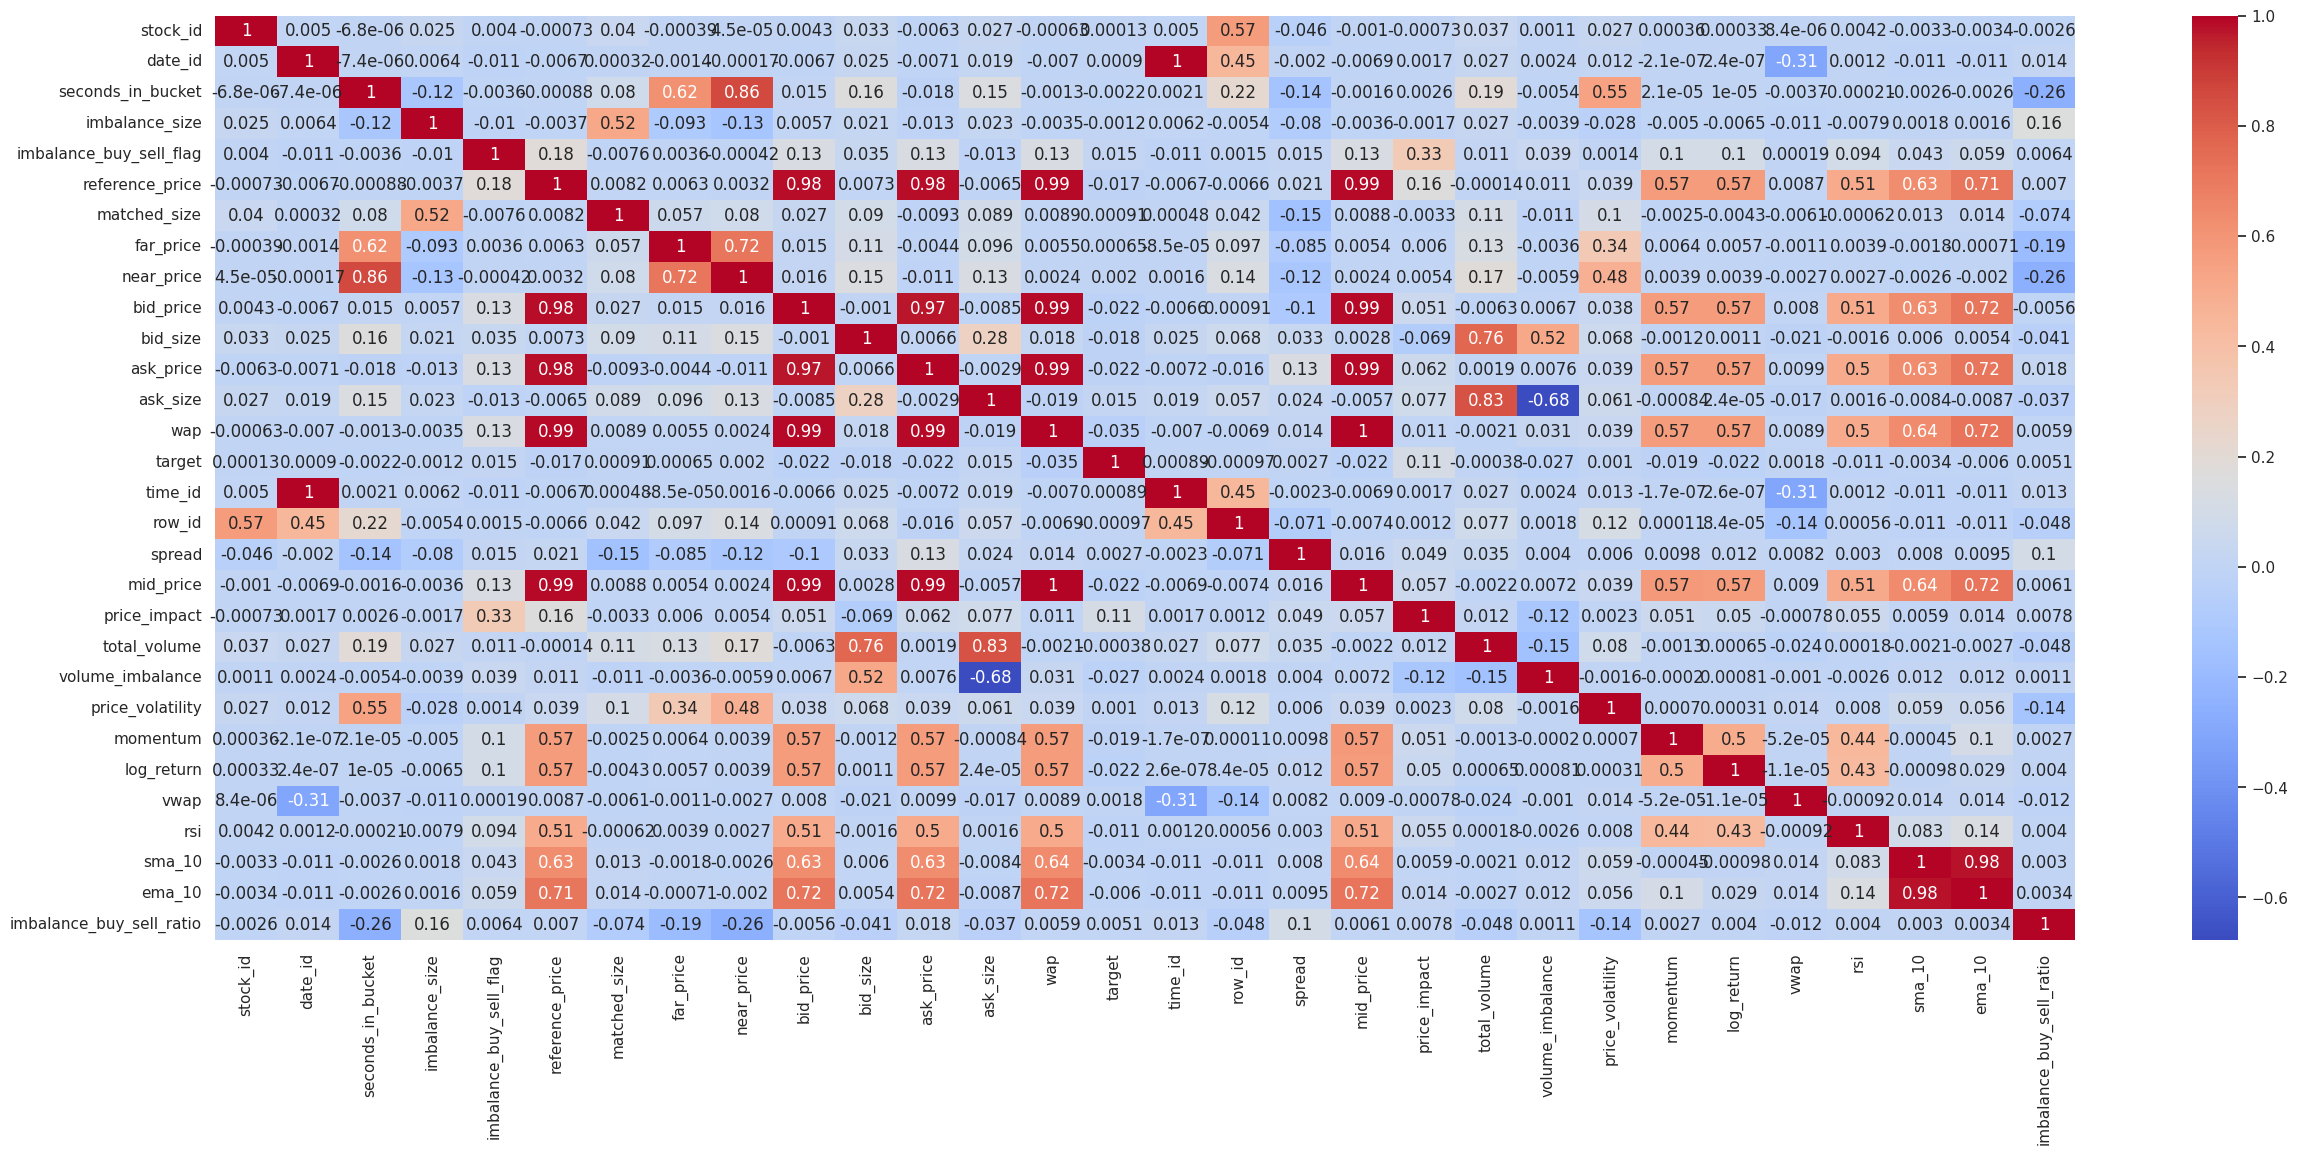

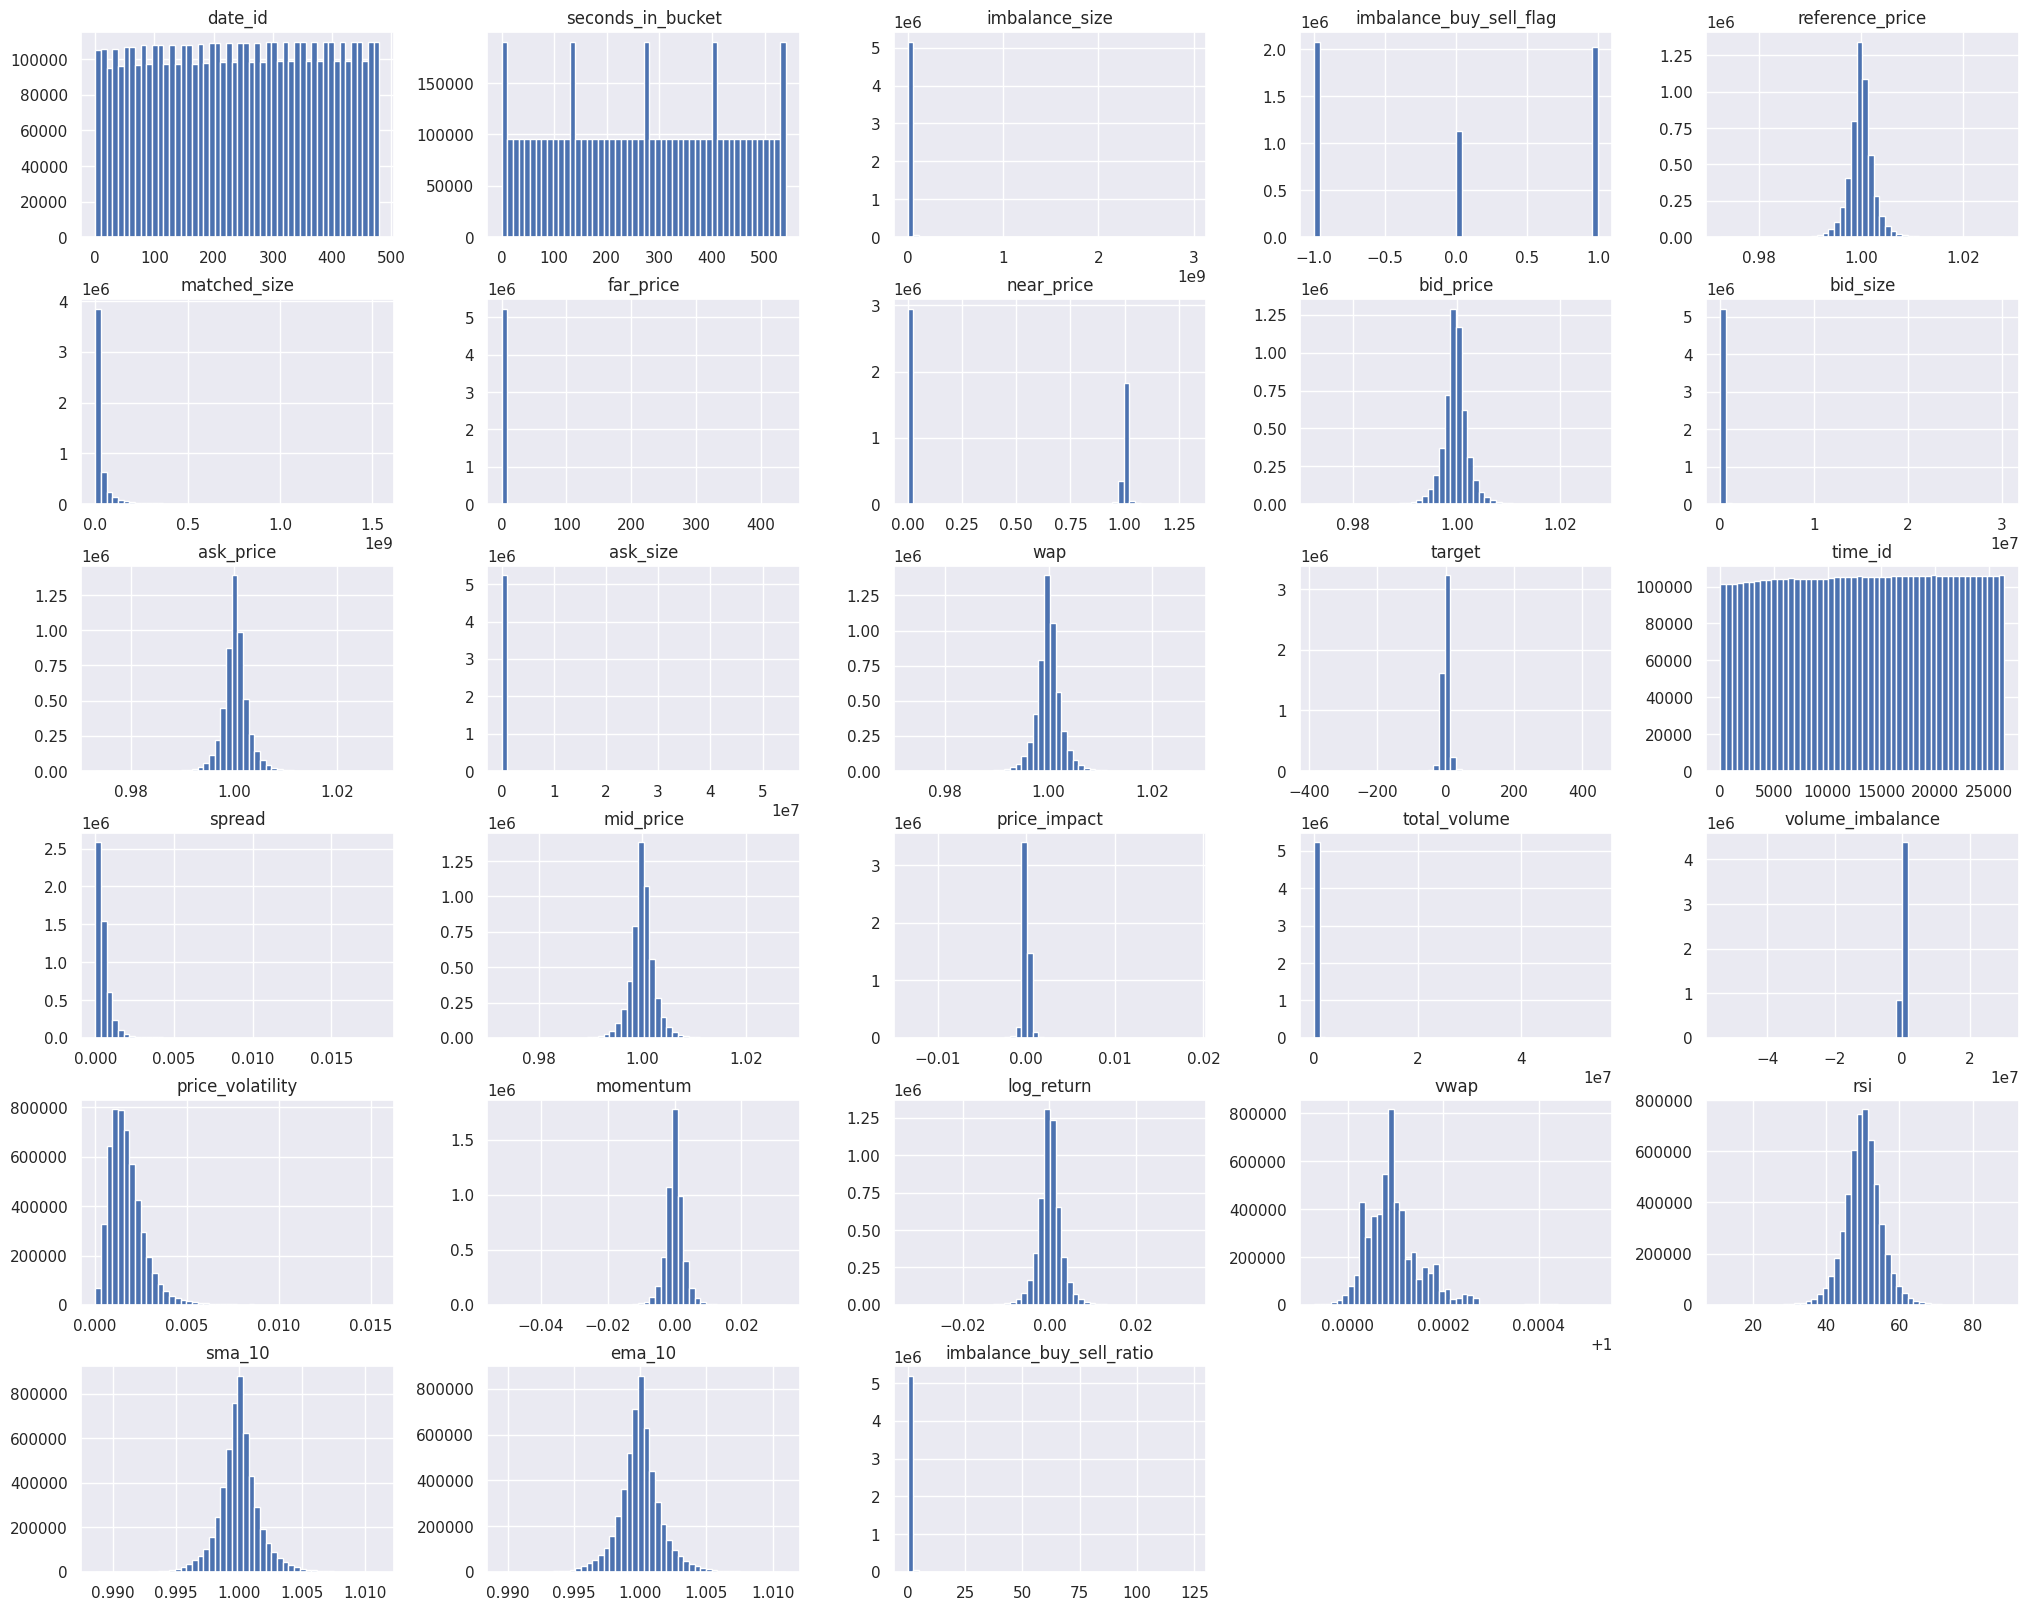

In [58]:
corr_matrix = df.corr()
plt.figure(figsize=(30, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()
df.drop('stock_id',axis=1).hist(bins=50, figsize=(25,20))
plt.show()

In [60]:
X = df.drop(["target"], axis=1)
y = df[["target"]]

In [61]:
def feature_cols(df) :
    cols = [c for c in df.columns if c not in ['row_id', 'time_id', 'date_id','row_id']]
    df = df[cols]    
    return df
df=feature_cols(df)

### Training LightGBM Model

1. **Model Training**:
   - Initializes a LightGBM regression model (`lgb_model`) using the default parameters.
   - Fits the model to the features (`X`) and target (`y`) data using the `fit()` method.

### Visualizing Feature Importance

2. **Define `plot_importance` Function**:
   - Defines a function named `plot_importance` that takes the trained model (`model`), features (`features`), and an optional parameter `num` specifying the number of features to display.
   - Calculates the feature importance using the `feature_importances_` attribute of the model.
   - Creates a DataFrame (`feature_imp`) containing feature importance values and corresponding feature names.
   - Creates a bar plot to visualize feature importance, displaying the top `num` features.
   - Sets the title and adjusts the layout of the plot for better visualization.

3. **Call `plot_importance` Function**:
   - Calls the `plot_importance` function with the trained LightGBM model (`lgb_model`) and the features (`X`) as input.

This visualization helps to identify the most important features used by the LightGBM model for making predictions.


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 2.929017 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 6123
[LightGBM] [Info] Number of data points in the train set: 5237747, number of used features: 26
[LightGBM] [Info] Start training from score -0.047588


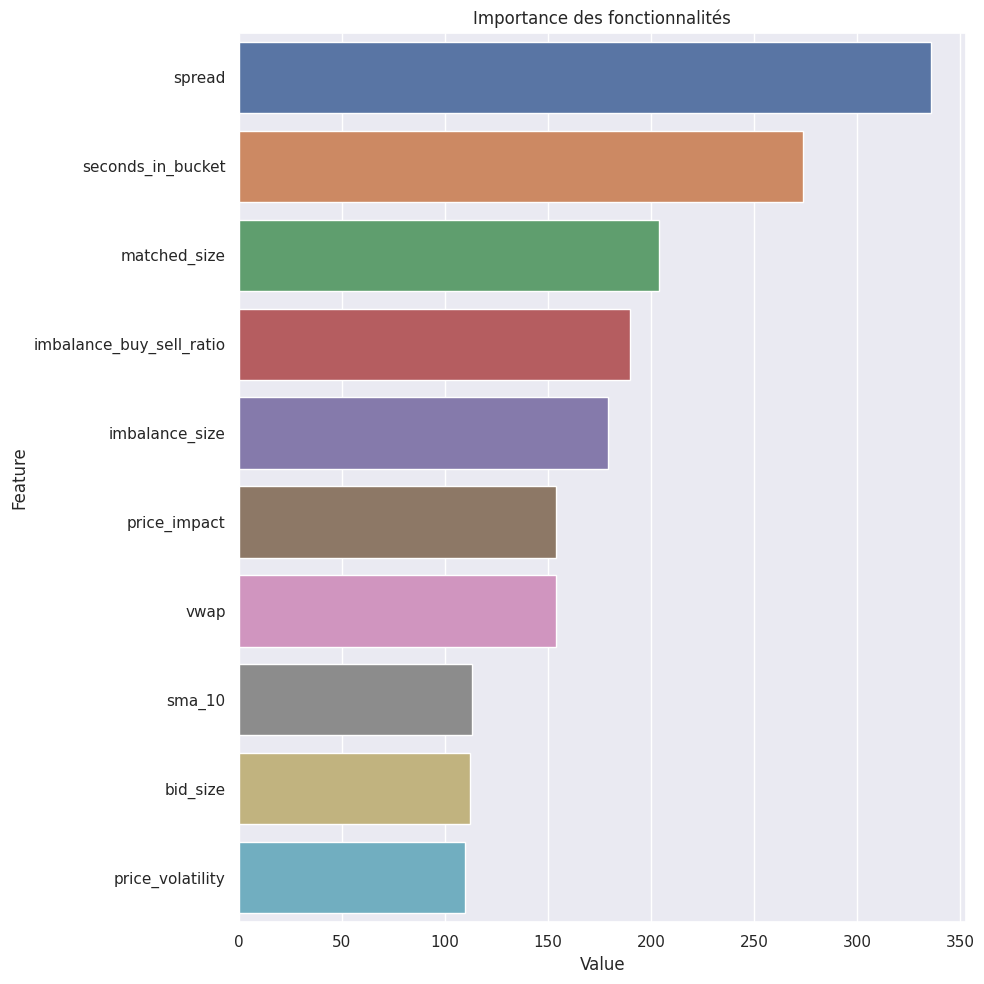

In [63]:

lgb_model = lgbm.LGBMRegressor()
lgb_model.fit(X, y)  

def plot_importance(model, features, num=10):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False)[0:num])
    plt.title('Importance des fonctionnalités')
    plt.tight_layout()
    plt.show()
plot_importance(lgb_model, X)


In [64]:
feature_imp = pd.DataFrame({'Value': lgb_model.feature_importances_, 'Feature': X.columns})

In [65]:
feature_imp

,Value,Feature
0,99,stock_id
1,274,seconds_in_bucket
2,179,imbalance_size
3,82,imbalance_buy_sell_flag
4,58,reference_price
5,204,matched_size
6,69,far_price
7,72,near_price
8,63,bid_price
9,112,bid_size


In [94]:
colonnes_importantes = feature_imp[feature_imp['Value'] > 200]['Feature'].tolist()# Remplacez par les colonnes sélectionnées par LGBM

# Sélection des colonnes dans votre dataframe
X_selected = X[colonnes_importantes]
lgb_model = lgbm.LGBMRegressor()
lgb_model.fit(X_selected, y)
y_pred=lgb_model.predict(X_selected)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.325210 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 5237747, number of used features: 3
[LightGBM] [Info] Start training from score -0.047588


In [95]:
lgb_model = lgbm.LGBMRegressor()
lgb_model.fit(X_selected, y)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.313829 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 565
[LightGBM] [Info] Number of data points in the train set: 5237747, number of used features: 3
[LightGBM] [Info] Start training from score -0.047588


LGBMRegressor()

In [96]:
y_pred=lgb_model.predict(X_selected)

In [100]:
mae = mean_absolute_error(y, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 6.401554622913736


In [79]:
colonnes_importantes = feature_imp[feature_imp['Value'] > 100]['Feature'].tolist()
X_selected = X[colonnes_importantes]


In [87]:
# Définir le modèle de base
lgb_model = lgbm.LGBMRegressor()

# Définir la grille d'hyperparamètres
param_grid = {
    'num_leaves': [31 ,100],
    'learning_rate': [0.01, 0.15],
    'n_estimators': [100, 200],
    'min_child_samples': [20, 50],
}


In [89]:
# Configurer RandomizedSearchCV
random_search = RandomizedSearchCV( # type: ignore
    estimator=lgb_model,
    param_distributions=param_grid,
    n_iter=50,  # nombre d'itérations
    scoring='neg_mean_squared_error',  # critère d'évaluation
    cv=3,  # validation croisée
    verbose=1,
    random_state=42,
    n_jobs=-1
)

In [90]:
# Effectuer la recherche
random_search.fit(X_selected, y)
# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :", random_search.best_params_)
print("Meilleur score :", random_search.best_score_)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.959554 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 3491831, number of used features: 12
[LightGBM] [Info] Start training from score -0.032470
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.836947 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train set: 3491831, number of used features: 12
[LightGBM] [Info] Start training from score -0.071411
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.817532 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2860
[LightGBM] [Info] Number of data points in the train 

In [92]:
# Entraîner le modèle avec les meilleurs paramètres
best_lgb_model = random_search.best_estimator_

Root Mean Squared Error: 9.287837256048071


In [93]:
mae = mean_absolute_error(y, y_pred)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 6.297175258788954
